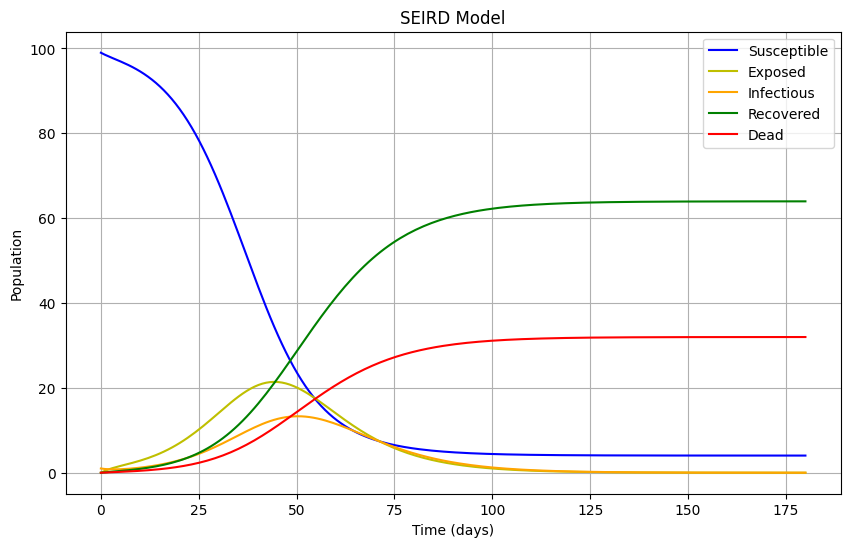

Final susceptible: 4.04
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 63.97
Final deceased: 31.98


In [35]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

# Define the SEIR model
def seird_model(y, t, N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment):
    S, E, I, R, D = y
    if t > time_of_containment:
        beta = beta * containment_effectiveness
    else:
        beta
    
    gamma = gamma * (1 + healthcare_quality)
    
    # differential equations
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I - delta * I
    dRdt = gamma * I
    dDdt = delta * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

# Initial conditions
N = 100  # Total population
I0 = 1         # Initial number of infected individuals
E0 = 0         # Initial number of exposed individuals
R0 = 0         # Initial number of recovered individuals
D0 = 0       # Initial dead population
S0 = N - I0 - E0 - R0  # Initial number of susceptible individuals
y0 = S0, E0, I0, R0, D0

# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 1 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
# plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

# checking that the final values still sum to N (total population)
total_population = S + E + I + R + D
assert np.allclose(total_population, N), "Population is not conserved!"

# displaying the final values for each piece of the model (this is the metric that I'm using to primarily evaluate the effectivenessmodel)
print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# original model with healthcare quality = 0 and containment effectiveness = 1 (no containment)

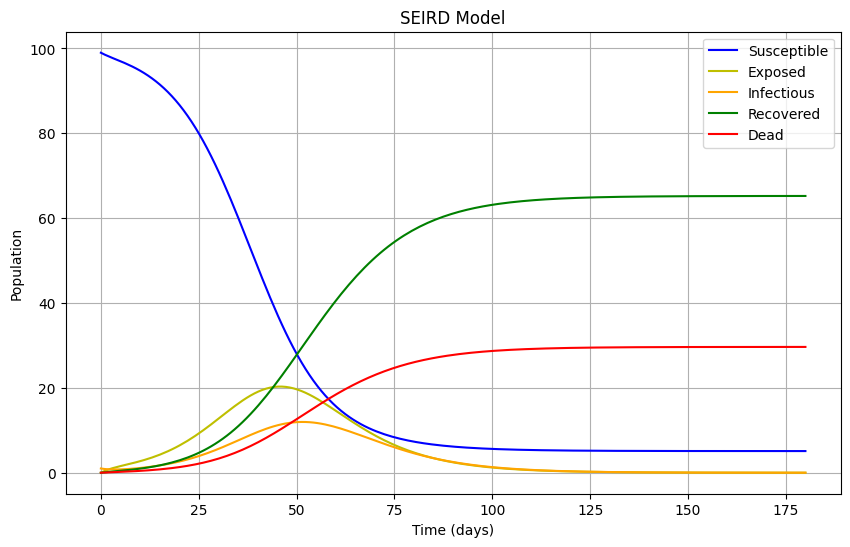

Final susceptible: 5.10
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 65.24
Final deceased: 29.65


In [36]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.1 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 1 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
# plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Healthcare quality is increased to 0.1, which increases the recovery rate gamma slightly.
# No containment measures are taken, so the beta value remains the same.

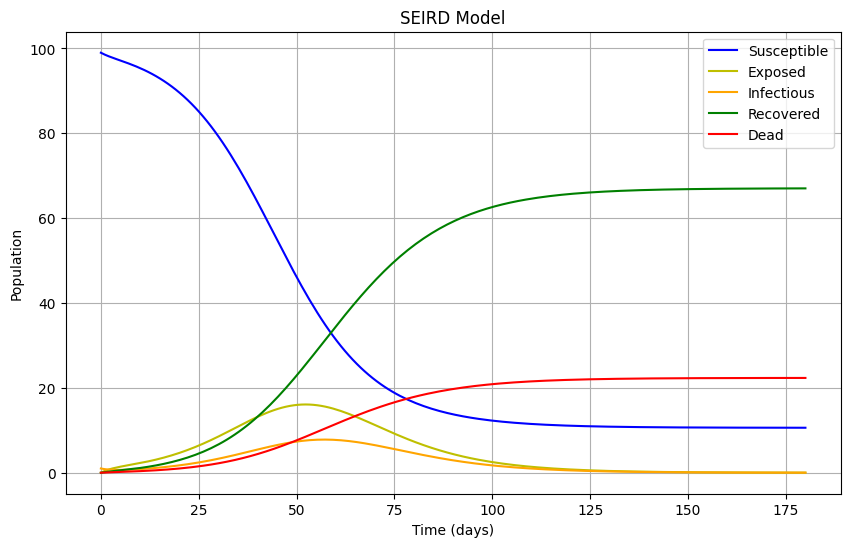

Final susceptible: 10.60
Final exposed: 0.02
Final infectious: 0.01
Final recovered: 67.02
Final deceased: 22.34


In [37]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.5 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 1 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
# plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Healthcare quality is increased to 0.5, which increases the recovery rate gamma by a larger amount.
# No containment measures are taken, so the beta value remains the same.

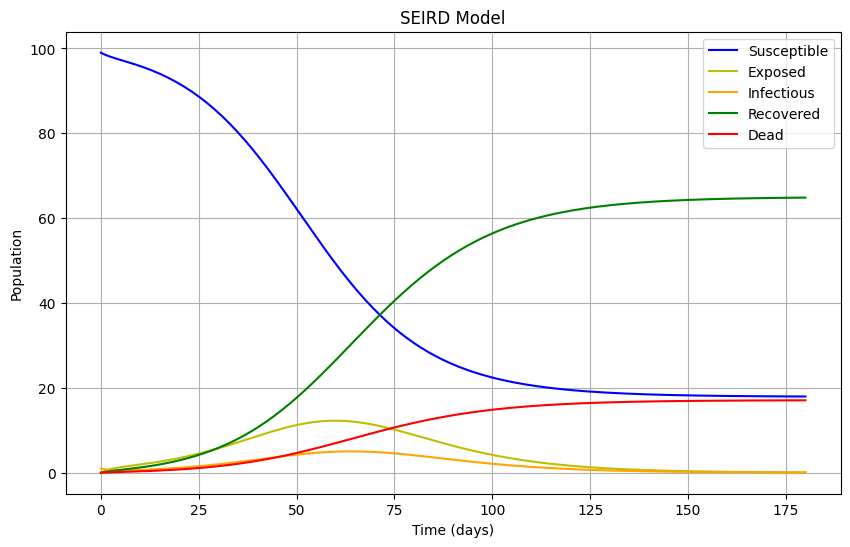

Final susceptible: 17.97
Final exposed: 0.08
Final infectious: 0.04
Final recovered: 64.85
Final deceased: 17.07


In [61]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.9 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 1 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
# plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Healthcare quality is increased to 0.9, which increases the recovery rate gamma by a large amount.
# No containment measures are taken, so the beta value remains the same.

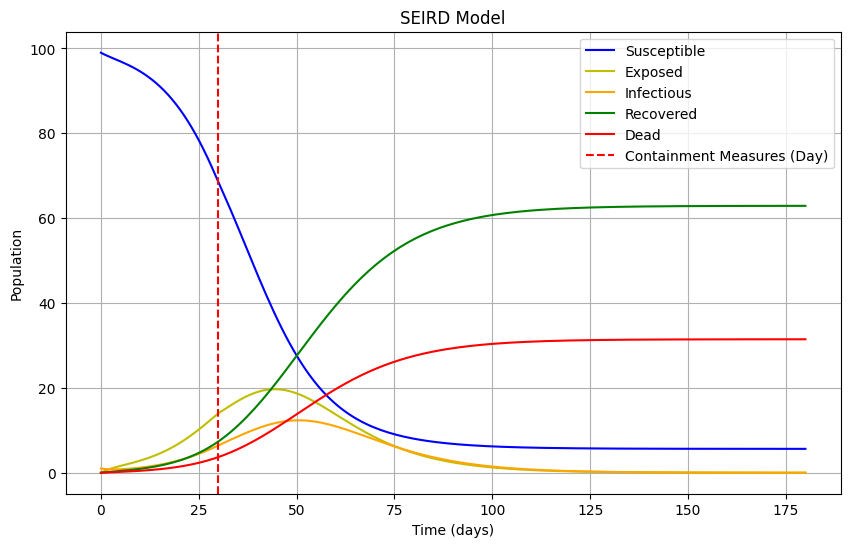

Final susceptible: 5.63
Final exposed: 0.01
Final infectious: 0.01
Final recovered: 62.91
Final deceased: 31.45


In [39]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.9 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# now we are testing the effect of containment measures on the spread of the # beta is decreased by 0.9, which slows the spread of the disease.
# we have reset the healthcare quality to 0, so the recovery rate gamma is not affected.
# all containment measures are taken after 30 days, and the effectiveness is then applied.

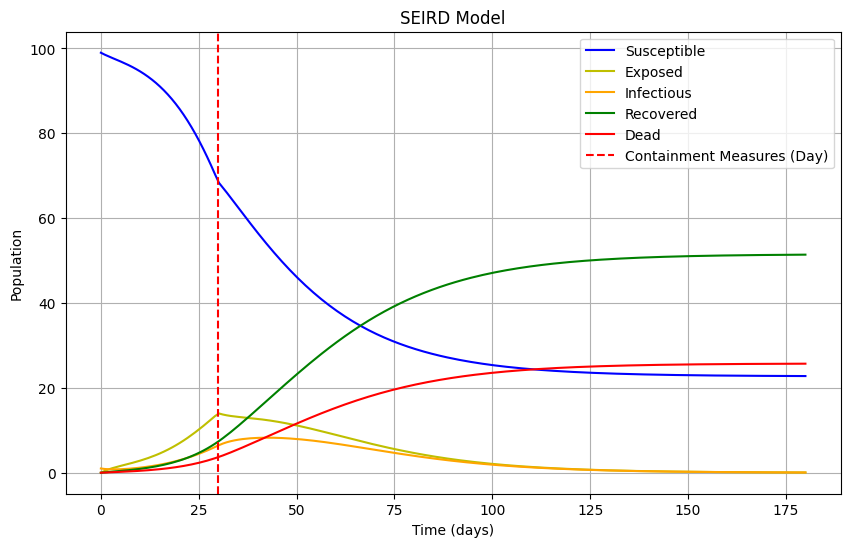

Final susceptible: 22.78
Final exposed: 0.06
Final infectious: 0.06
Final recovered: 51.40
Final deceased: 25.70


In [40]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.5 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# here containment measures are a bit more effective, with beta being decreased by 0.5.
# the spread of the disease is slowed, but not stopped completely.
# measures are implemented on day 30.

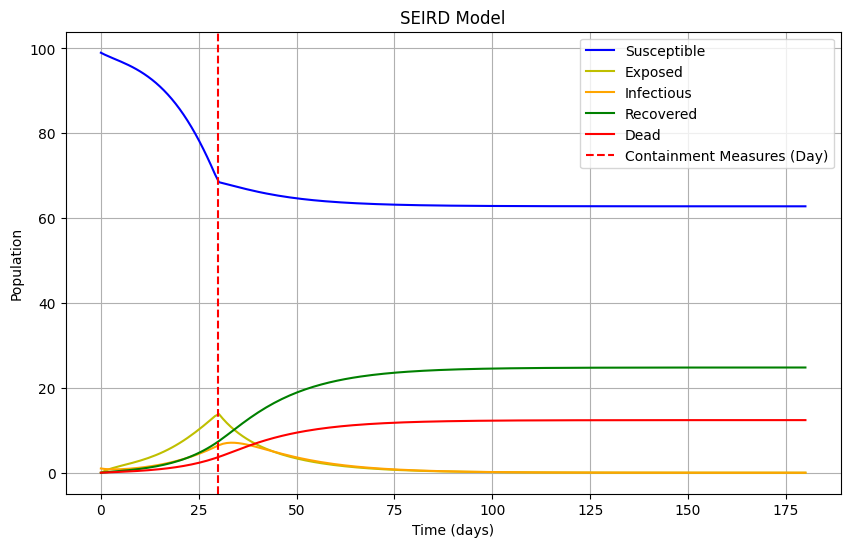

Final susceptible: 62.80
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 24.80
Final deceased: 12.40


In [41]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.0 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.1 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# here containment measures are almost completely effective, with beta being decreased by a factor of 0.1.
# the spread of the disease is almost completely stopped on containment.

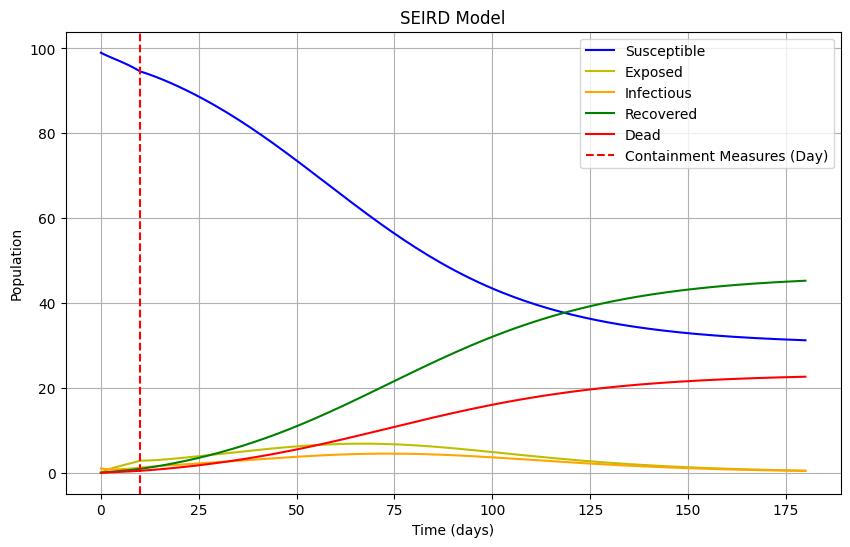

Final susceptible: 31.22
Final exposed: 0.48
Final infectious: 0.41
Final recovered: 45.26
Final deceased: 22.63


In [42]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.5 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 10

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# here containment measures are implemented on day 10, and are 50% effective.
# the spread of the disease is slowed, but not stopped completely.

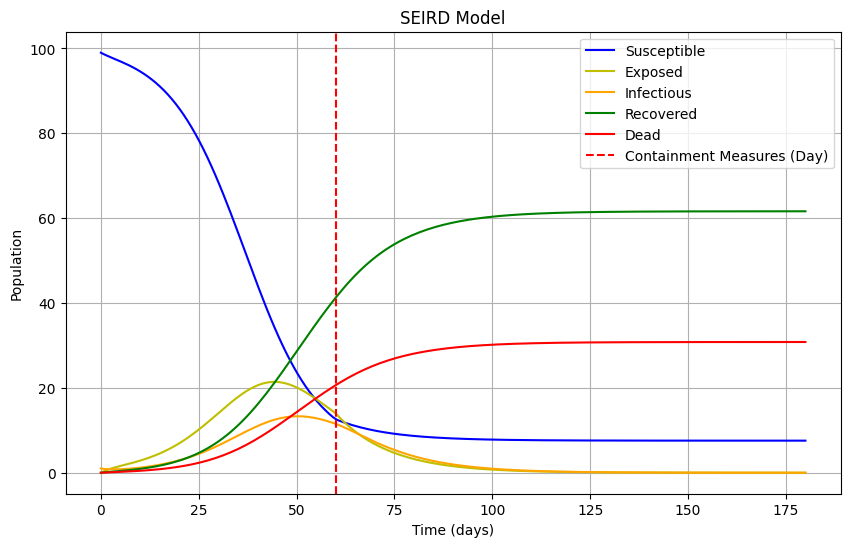

Final susceptible: 7.56
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 61.62
Final deceased: 30.81


In [43]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.5 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 60

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# here containment measures are implemented on day 60, and are 50% effective.
# more people have died than when containment measures were implemented earlier.

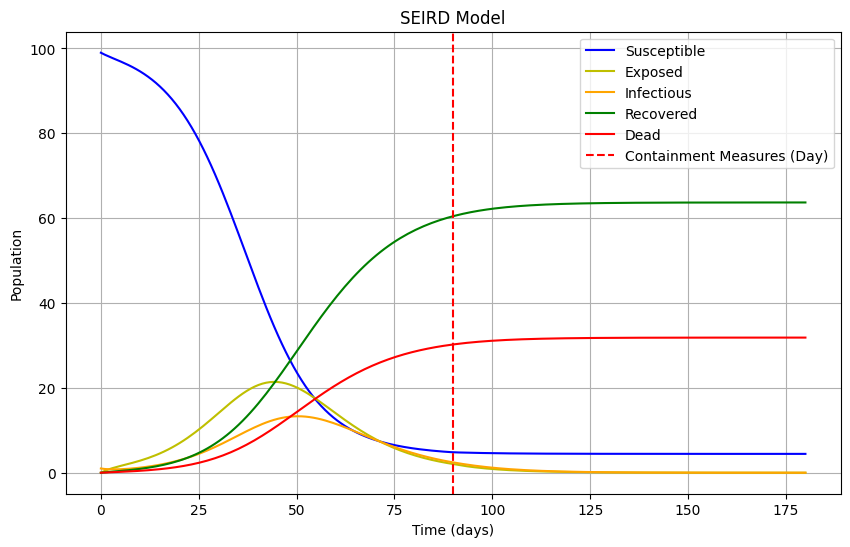

Final susceptible: 4.44
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 63.70
Final deceased: 31.85


In [44]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.5 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 90

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# here containment measures are implemented on day 90, and are 50% effective.
# more people have died than when containment measures were implemented earlier.
# the graph looks similar to our base model, with no containment measures.
# this suggests that containment measures are not very effective when implemented late.


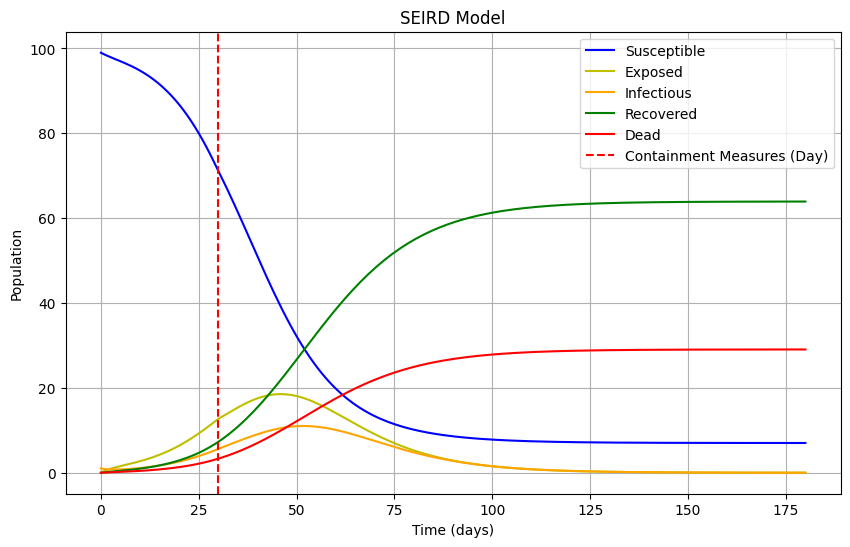

Final susceptible: 7.01
Final exposed: 0.01
Final infectious: 0.01
Final recovered: 63.92
Final deceased: 29.05


In [45]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.1 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.9 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# here we have a combination of healthcare quality and containment measures.
# in the first run, containment measures are implemented on day 10, and are fairly ineffective.
# the quality of healthcare is very low, but still has some effect on the recovery rate gamma.

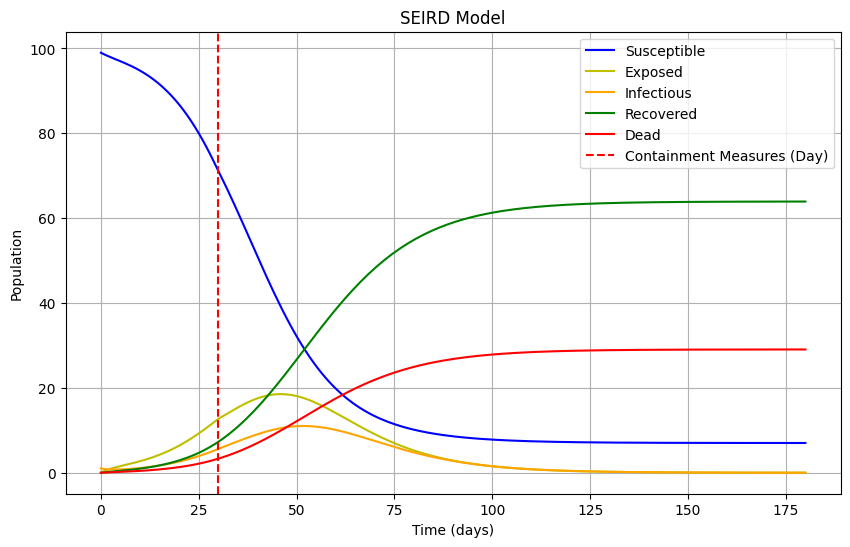

Final susceptible: 7.01
Final exposed: 0.01
Final infectious: 0.01
Final recovered: 63.92
Final deceased: 29.05


In [46]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.1 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.9 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# heres another combination of healthcare quality and containment measures.
# we've moved the containment measures to day 30
# the graph looks similar to our base model, with no containment measures.


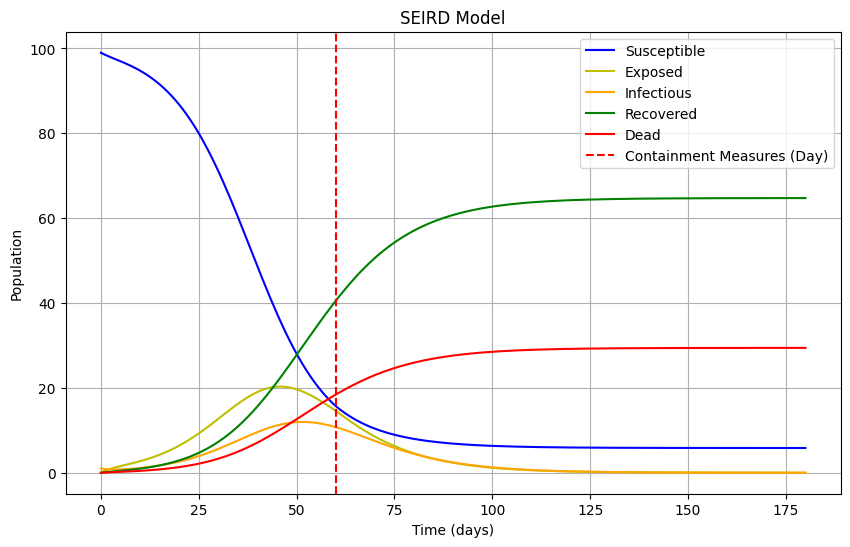

Final susceptible: 5.83
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 64.74
Final deceased: 29.43


In [47]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.1 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.9 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 60

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# here we have another combination of healthcare quality and containment measures.
# we've moved the containment measures to day 60 which is very late.
# as expected, the disease has already run its course, and thus the model looks very similar to the base model.

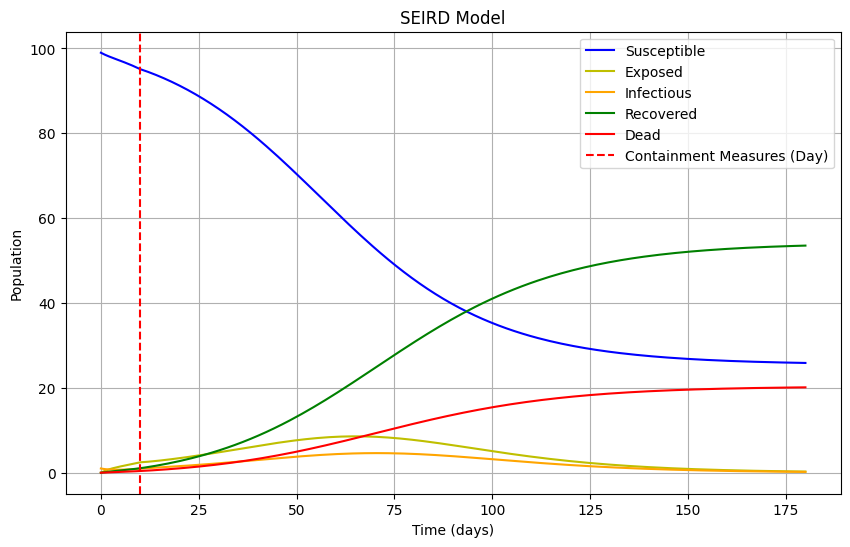

Final susceptible: 25.87
Final exposed: 0.27
Final infectious: 0.19
Final recovered: 53.54
Final deceased: 20.13


In [48]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.33 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.66 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 10

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 10, and are somewhat effective.
# the healthcare quality is set to 0.33, below average, but more significant than 0.1.


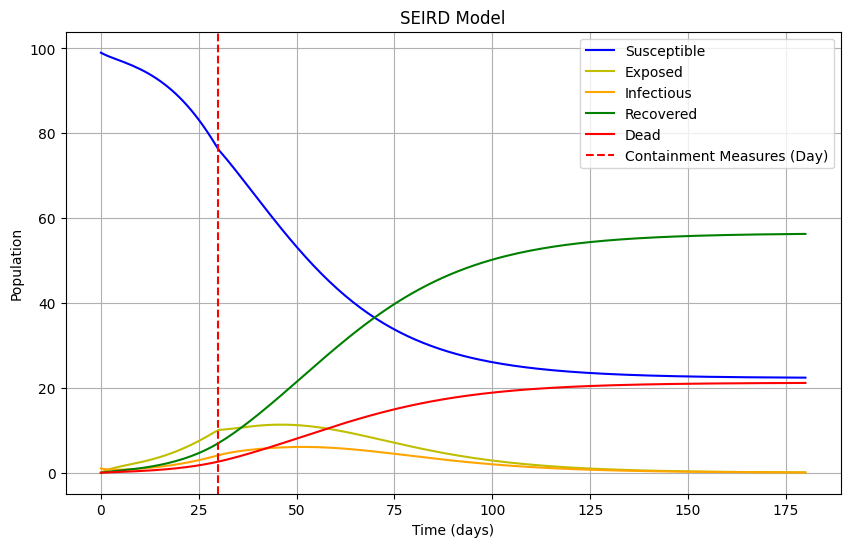

Final susceptible: 22.41
Final exposed: 0.08
Final infectious: 0.06
Final recovered: 56.29
Final deceased: 21.16


In [49]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.33 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.66 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 30, and are somewhat effective.
# the healthcare quality is set to 0.33, below average, but more significant than 0.1.

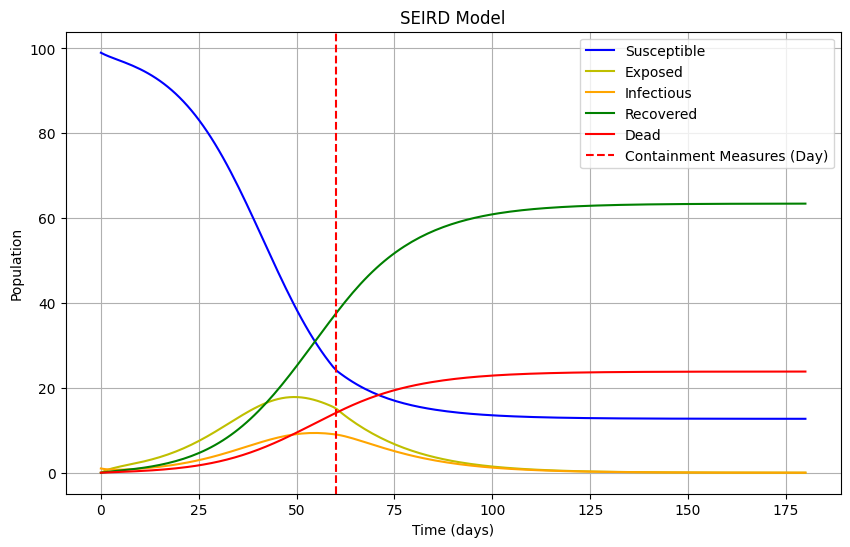

Final susceptible: 12.71
Final exposed: 0.01
Final infectious: 0.01
Final recovered: 63.43
Final deceased: 23.85


In [50]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.33 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.66 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 60

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 60, and are somewhat effective.
# the healthcare quality is set to 0.33, below average, but more significant than 0.1.

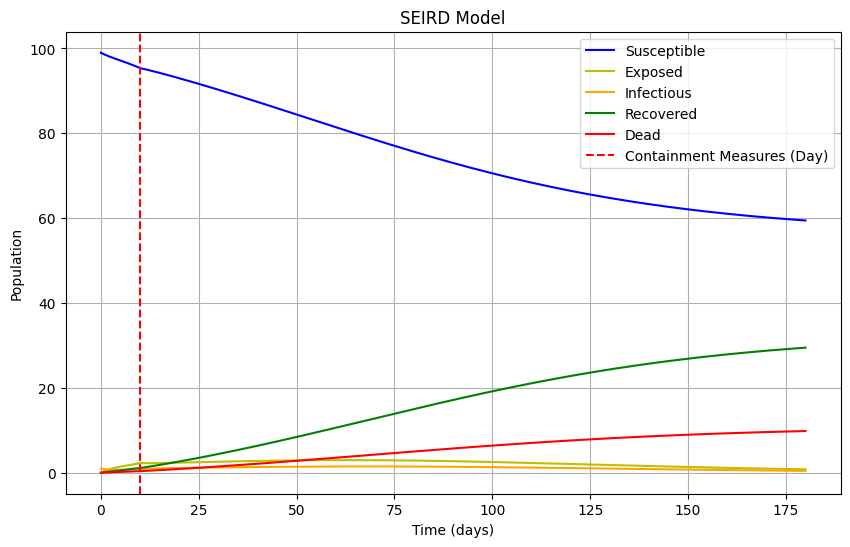

Final susceptible: 59.45
Final exposed: 0.80
Final infectious: 0.44
Final recovered: 29.48
Final deceased: 9.83


In [51]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.5 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.5 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 10

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 10, and are average.
# the healthcare quality is set to 0.5, average, and has a significant effect on the recovery rate gamma.

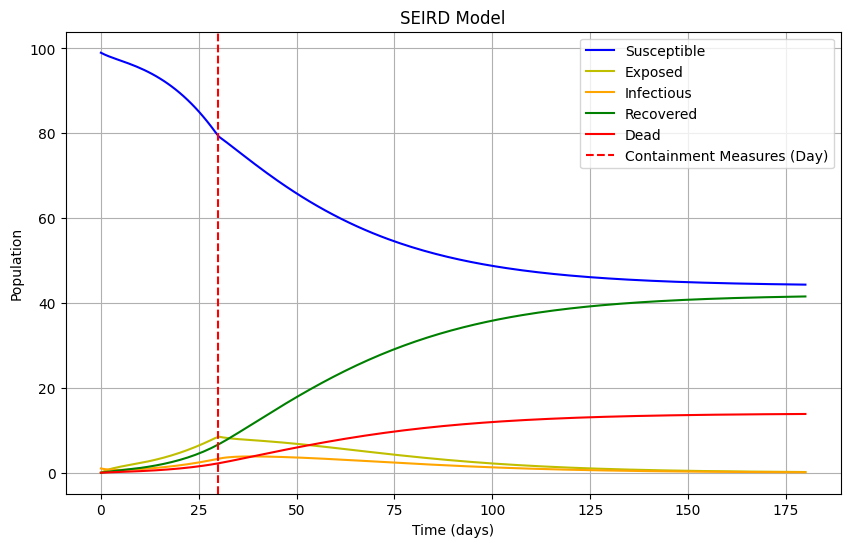

Final susceptible: 44.34
Final exposed: 0.17
Final infectious: 0.10
Final recovered: 41.55
Final deceased: 13.85


In [52]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.5 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.5 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 30, and are average.
# the healthcare quality is set to 0.5, average, and has a significant effect on the recovery rate gamma.

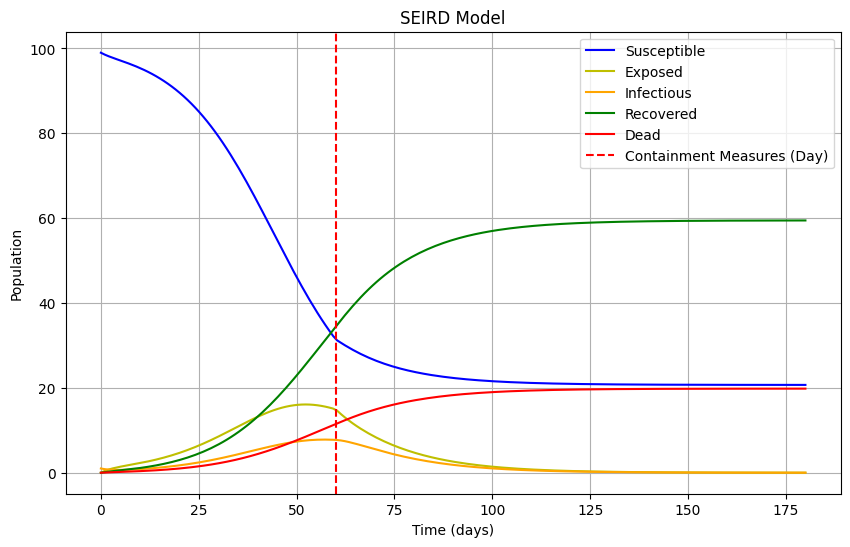

Final susceptible: 20.70
Final exposed: 0.01
Final infectious: 0.01
Final recovered: 59.46
Final deceased: 19.82


In [53]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.5 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.5 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 60

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 60, and are average.
# the healthcare quality is set to 0.5, average, and has a significant effect on the recovery rate gamma.

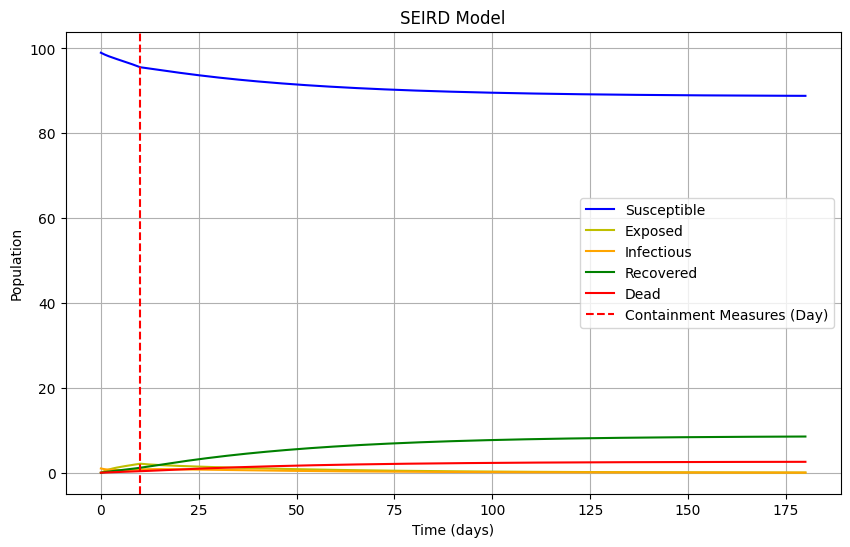

Final susceptible: 88.84
Final exposed: 0.04
Final infectious: 0.02
Final recovered: 8.53
Final deceased: 2.57


In [54]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.66 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.33 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 10

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 10 and are more effective than average.
# the healthcare quality is set to 0.33, above average, and has a significant effect on the recovery rate gamma.

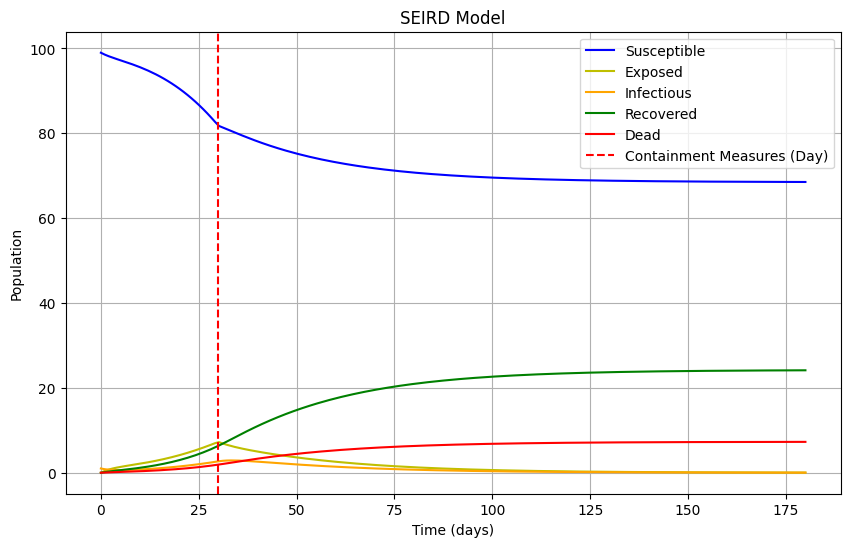

Final susceptible: 68.53
Final exposed: 0.03
Final infectious: 0.02
Final recovered: 24.14
Final deceased: 7.27


In [55]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.66 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.33 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 30 and are more effective than average.
# the healthcare quality is set to 0.33, above average, and has a significant effect on the recovery rate gamma.

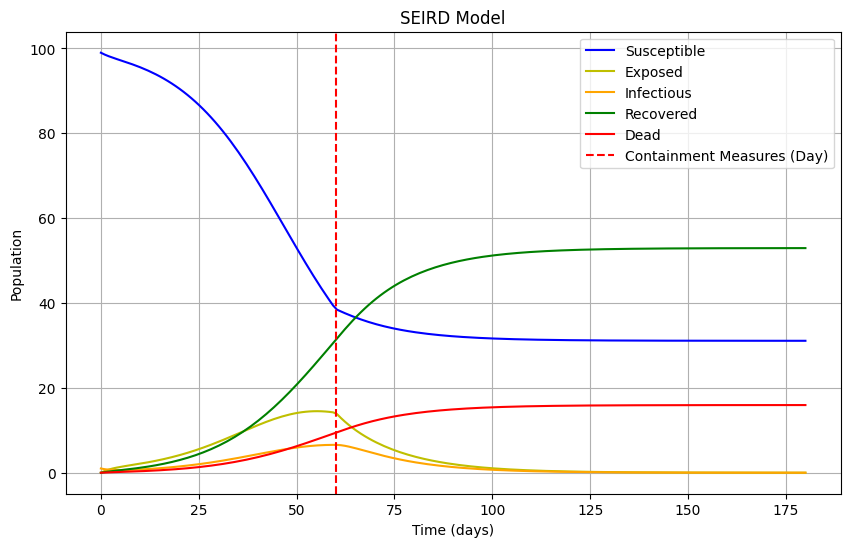

Final susceptible: 31.10
Final exposed: 0.01
Final infectious: 0.00
Final recovered: 52.95
Final deceased: 15.95


In [56]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.66 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.33 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 60

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 60 and are more effective than average.
# the healthcare quality is set to 0.33, above average, and has a significant effect on the recovery rate gamma.


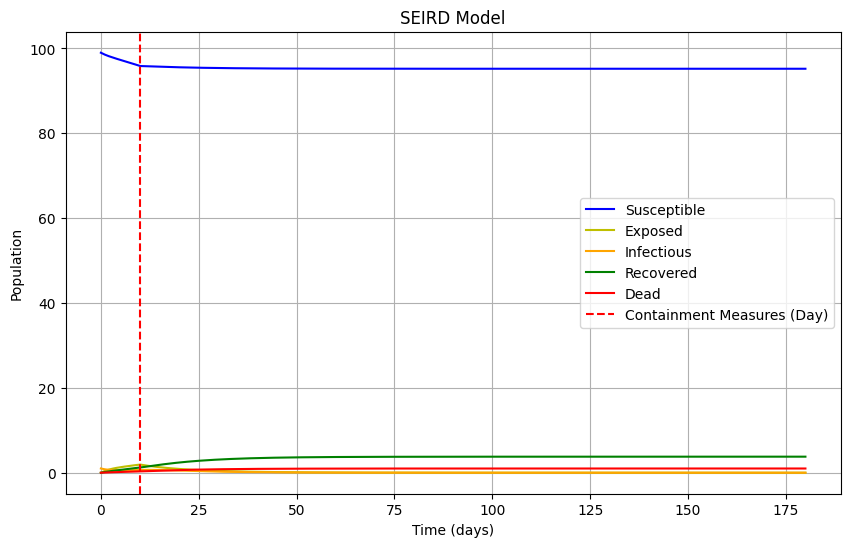

Final susceptible: 95.22
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 3.78
Final deceased: 1.00


In [57]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.9 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.1 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 10

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 10 and nearly perfect.
# the healthcare quality is set to 0.1, which is representative of very high quality healthcare.


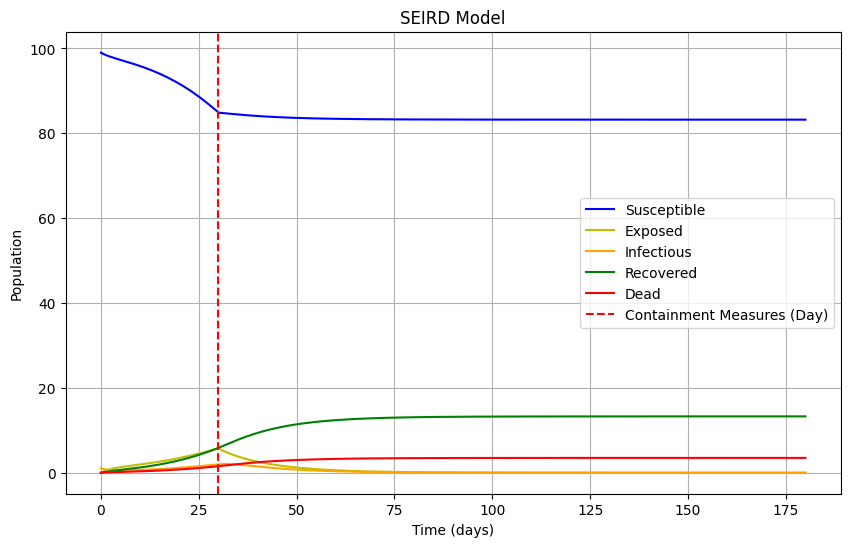

Final susceptible: 83.23
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 13.28
Final deceased: 3.49


In [58]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.9 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.1 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 30

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 30 and nearly perfect.
# the healthcare quality is set to 0.1, which is representative of very high quality healthcare.

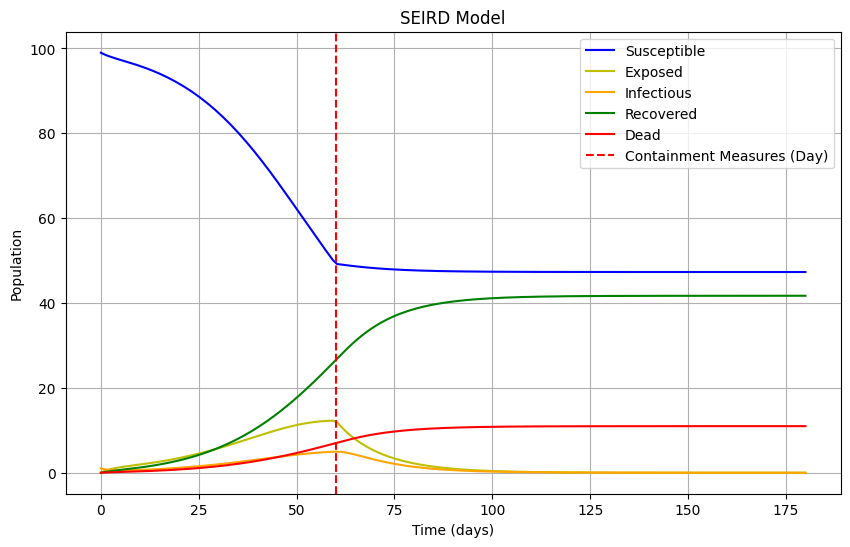

Final susceptible: 47.31
Final exposed: 0.00
Final infectious: 0.00
Final recovered: 41.71
Final deceased: 10.98


In [59]:
# Parameters
beta = 0.5     # Transmission rate
sigma = 1/10  # Progression rate (incubation period ~5.2 days)
gamma = 1/10   # Recovery rate (infectious period ~10 days)
delta = 0.05  # Death rate

healthcare_quality = 0.9 # buffs gamma by some scalar value between 0 and 1 (0 = no healthcare, 1 = perfect healthcare) 
containment_effectiveness = 0.1 # debuffs beta by some scalar value between 0 and 1 (0 = perfect containment, 1 = no containment)
time_of_containment = 60

# Time grid (days)
t = np.linspace(0, 180, 180)

# Solve the differential equations
solution = odeint(seird_model, y0, t, args=(N, beta, sigma, gamma, delta, healthcare_quality, containment_effectiveness, time_of_containment))
S, E, I, R, D = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color = 'b')
plt.plot(t, E, label='Exposed', color = 'y')
plt.plot(t, I, label='Infectious', color = 'orange')
plt.plot(t, R, label='Recovered', color = 'g')
plt.plot(t, D, label='Dead', color = 'r')
plt.axvline(x=time_of_containment, color='r', linestyle='--', label='Containment Measures (Day)')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIRD Model')
plt.grid()
plt.show()

print(f"Final susceptible: {S[-1]:.2f}")
print(f"Final exposed: {E[-1]:.2f}")
print(f"Final infectious: {I[-1]:.2f}")
print(f"Final recovered: {R[-1]:.2f}")
print(f"Final deceased: {D[-1]:.2f}")

# Another combination of healthcare quality and containment measures is tested.
# the containment measures are implemented on day 60 and nearly perfect.
# the healthcare quality is set to 0.1, which is representative of very high quality healthcare.

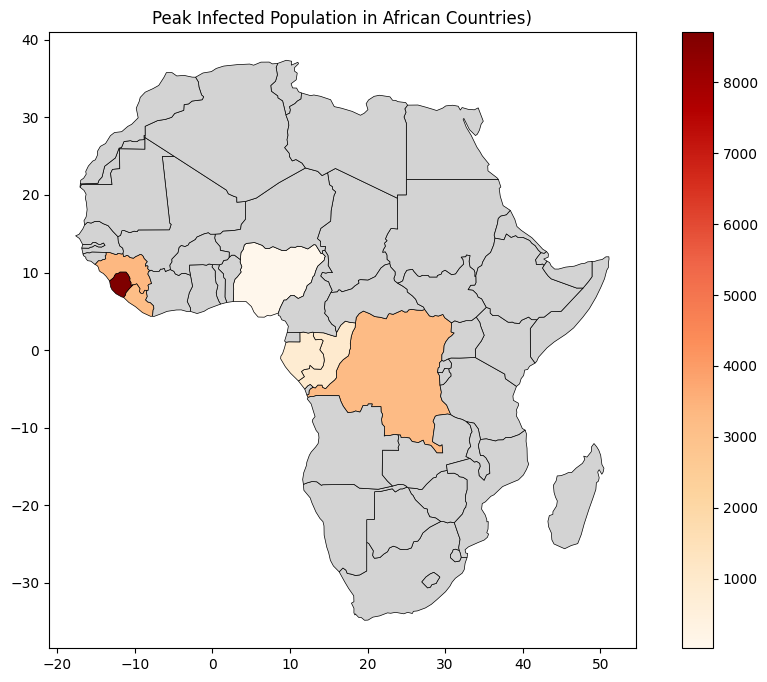

In [62]:
import folium
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from branca.colormap import linear

# Load the shapefile into a GeoDataFrame
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Load in the city data
# cities = gpd.read_file("/Users/JasonHunter/Desktop/ne_110m_populated_places/ne_110m_populated_places.shp")


# Filter out only African countries
africa = world[world['CONTINENT'] == 'Africa']
# cities = cities[cities['ADM0NAME'].isin(africa['ADMIN'])]
# print(cities.head())
# cities_grouped = cities.groupby('NAME')['geometry'].apply(lambda x: x.values.tolist()).reset_index()
# print(cities_grouped.head())



# Check the structure of the GeoDataFrame
# print(africa.head())

seir_results = pd.DataFrame({
    'ADMIN': ['Nigeria', 'Guinea', 'Sierra Leone', 'Liberia', 'Democratic Republic of the Congo', 'Gabon', 'Republic of the Congo'],  # Relevant countries
    'peak_infected': [19, 3351, 8704, 3153, 3250, 807, 950], # these numbers are from the dataset, but also some are from wikipedia
        
})

# Merge SEIR results with GeoDataFrame
africa = africa.merge(seir_results, on='ADMIN', how='left')

missing_count = africa['peak_infected'].isna().sum()
# print(missing_count)
total_count = len(africa)
# print(total_count)
missing_percentage = (missing_count / total_count) * 100

# Plot the map, coloring countries by peak infected
africa.plot(column='peak_infected', cmap='OrRd', legend=True, figsize=(12, 8), missing_kwds={'color': 'lightgrey'}, edgecolor='black', linewidth=0.5)
# plt.title('Peak Infected Population in African Countries')
plt.title(f'Peak Infected Population in African Countries)')

plt.show()

In [27]:
africa_json = africa.to_crs(epsg=4326).to_json() # epsg=4326 is the WGS84 coordinate system

# Define the color scale
color_scale = linear.YlOrRd_09.scale(africa['peak_infected'].min(), africa['peak_infected'].max())

# create a folium map centered on Africa
m = folium.Map(location=[10, 20], zoom_start=3, tiles = 'cartodbpositron', min_zoom= 2, max_bounds=True)

# add the GeoDataFrame as a choropleth layer
folium.Choropleth(
    geo_data=africa_json,
    data=africa,
    columns=['ADMIN', 'peak_infected'],
    key_on='feature.properties.ADMIN',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Peak Infected Population'
).add_to(m)

folium.GeoJson(
    africa_json,
    style_function=lambda feature: {
        'fillColor': color_scale(feature['properties']['peak_infected']) if feature['properties']['peak_infected'] else 'lightgrey',
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7,
    },
    highlight_function=lambda feature: {
        'weight': 3,
        'color': 'blue',
        'fillOpacity': 0.9,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['ADMIN', 'peak_infected'],
        aliases=['Country', 'Peak Infected'],
        localize=True
    )
).add_to(m)
# display the map
m.save("africa_seir_map.html")
m

cities = [
    # Nigeria
    {"name": "Lagos", "coords": [6.5244, 3.3792], "peak_infected": 19},
    {"name": "Port Harcourt", "coords": [4.74974, 6.82766], "peak_infected": 2},
    # Guinea
    {"name": "Gueckedou", "coords": [8.56744, -10.1336], "peak_infected": 11},
    {"name": "Macenta", "coords": [8.54301, -9.47101], "peak_infected": 2},
    {"name": "Kissidougou", "coords": [9.18333, -10.1], "peak_infected": 1},
    {"name": "Conakry", "coords": [9.50917, -13.71222], "peak_infected": 3351},
    # Liberia
    {"name": "Monrovia", "coords": [6.31056, -10.80472], "peak_infected": 3153},
    # Sierra Leone
    {"name": "Kailahun", "coords": [8.2789, -10.573], "peak_infected": 508},
    {"name": "Freetown", "coords": [8.4656, -13.2317], "peak_infected": 'Unknown'},
    {"name": "Kenema", "coords": [7.87687, -11.19025], "peak_infected": 395},
    {"name": "Kono", "coords": [9.1333, -10.8333], "peak_infected": 14},
    {"name": "Kambia", "coords": [9.1258, -12.9763], "peak_infected": 2},
    {"name": "Bombali", "coords": [9.3333, -12.2499] , "peak_infected": 73},
    {"name": "Tonkolili", "coords": [8.6667, -11.6667] , "peak_infected": 26},
    {"name": "Port Loko", "coords": [8.7661, -12.78696] , "peak_infected": 119},
    {"name": "Pujehun", "coords": [7.3333, -11.49998] , "peak_infected": 10},
    {"name": "Bo", "coords": [7.96472, -11.73833] , "peak_infected": 67},
    {"name": "Moyamba", "coords": [8.0, -12.49998] , "peak_infected": 14},
    {"name": "Bonthe", "coords": [7.52639, -12.505] , "peak_infected": 1}
    ]

for city in cities:
    folium.Marker(
        location=city['coords'],
        popup=f"{city['name']}: {city['peak_infected']} peak infections",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)
    
m.save("africa_seir_map.html")
m

In [28]:
ebola_data = pd.read_csv("pandemic_ebola_dataset.csv")
ebola_data.head(5)

,Country/Region,Date,Confirmed,Deaths,Lat,Long
0,Guinea,2014-08-29,482.0,287.0,9.945600,-9.696600
1,Nigeria,2014-08-29,15.0,6.0,9.082000,8.675300
2,Sierra Leone,2014-08-29,935.0,380.0,8.460555,-11.779889
3,Liberia,2014-08-29,322.0,225.0,6.428100,-9.429500
4,Sierra Leone,2014-09-05,1146.0,443.0,8.460555,-11.779889


In [29]:
# Number of cases per day

ebola_per_day = ebola_data.groupby('Date')[['Confirmed', 'Deaths']].max()
ebola_per_day

,Confirmed,Deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,508.0
2014-09-12,1287.0,498.0
2014-09-16,1464.0,563.0
...,...,...
2015-12-17,8704.0,3589.0
2015-12-22,8704.0,3589.0
2015-12-23,8704.0,3589.0


<Axes: xlabel='Date'>

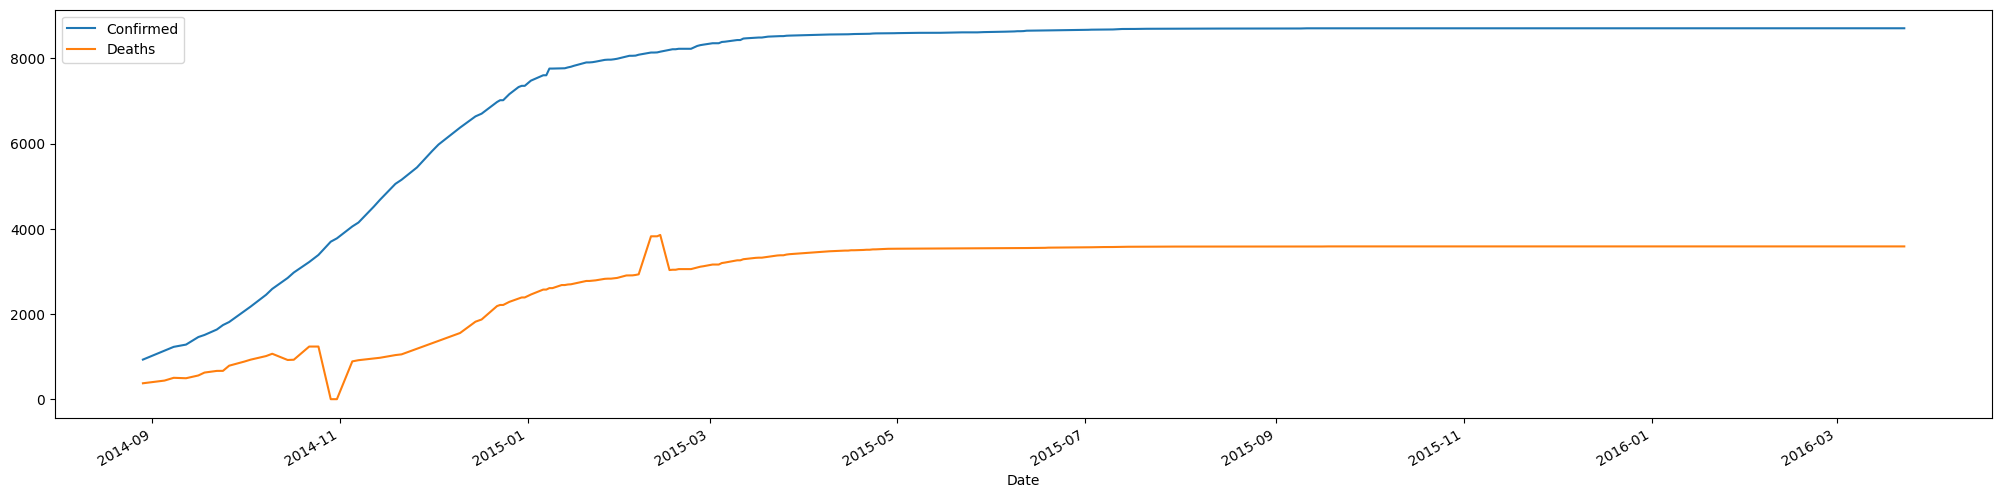

In [30]:
# displaying the entirety of the dataset
import datetime as dt
ebola = ebola_data.copy()
ebola['Date'] = pd.to_datetime(ebola['Date'])
ebola = ebola.set_index('Date')
ebola = ebola.loc['2014-08-29':'2016-03-29']
ebola_per_day = ebola.groupby('Date')[['Confirmed', 'Deaths']].max()
ebola_per_day.plot(kind='line', figsize = (25, 6))

In [31]:
# most affected countries
ebola_countries = ebola_data.groupby('Country/Region')[['Confirmed', 'Deaths']].max()
ebola_countries

,Confirmed,Deaths
Country/Region,,
Guinea,3351.0,2083.0
Italy,1.0,0.0
Liberia,3153.0,3858.0
Mali,7.0,5.0
Nigeria,19.0,7.0
Senegal,1.0,0.0
Sierra Leone,8704.0,3589.0
Spain,1.0,0.0
US,4.0,1.0


In [32]:
print(ebola['Country/Region'].value_counts())
# number of countries affected
print(len(ebola['Country/Region'].unique()))

Country/Region
Liberia           365
Guinea            259
Sierra Leone      259
Nigeria           255
Senegal           254
US                245
Spain             243
Mali              243
United Kingdom    221
Italy             141
Name: count, dtype: int64
10


<Axes: title={'center': 'Bar chart of countries with the highest number of deaths'}, xlabel='Country/Region'>

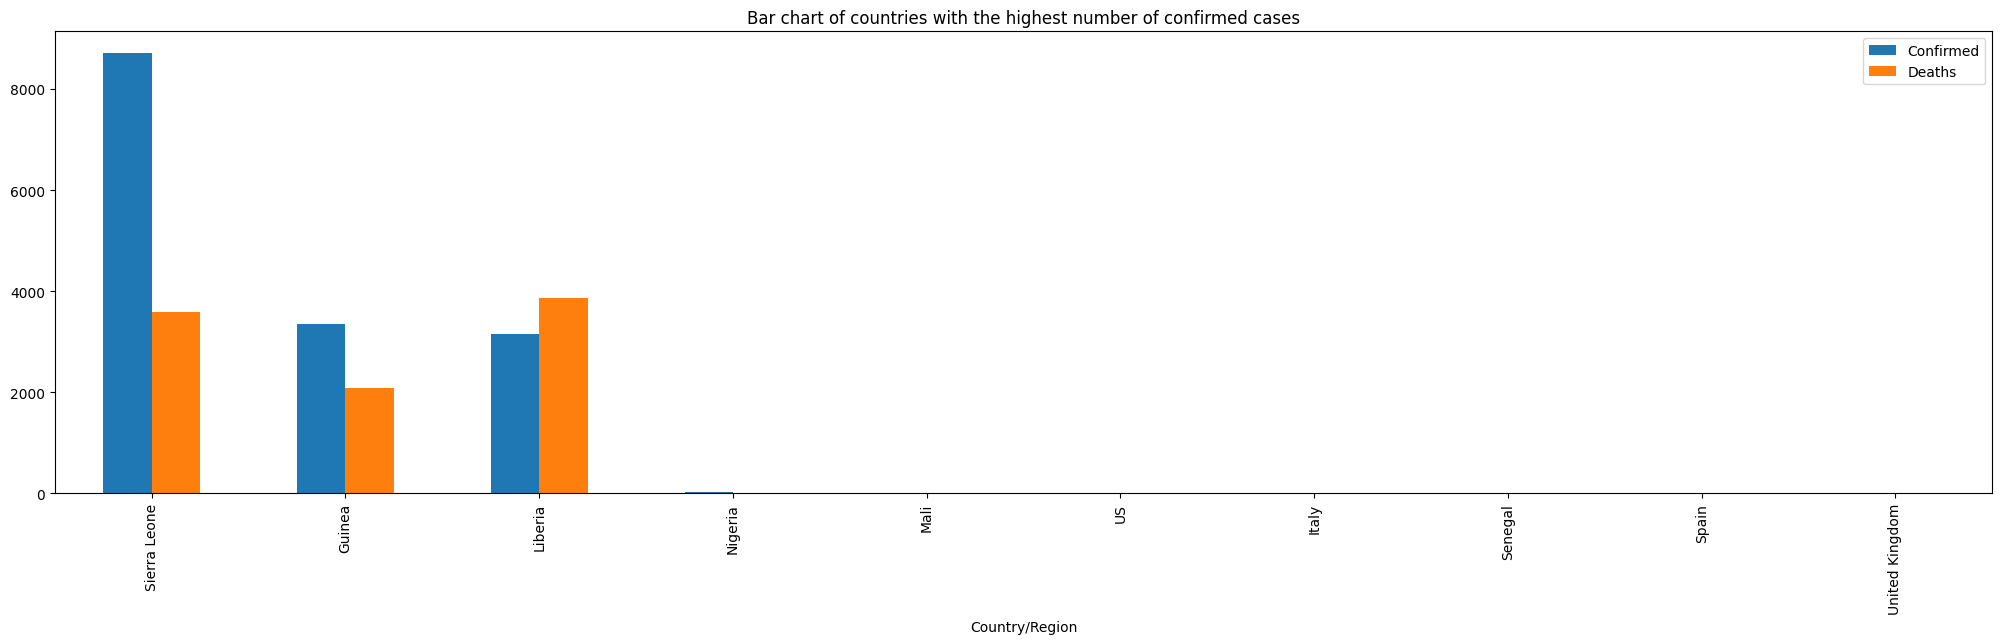

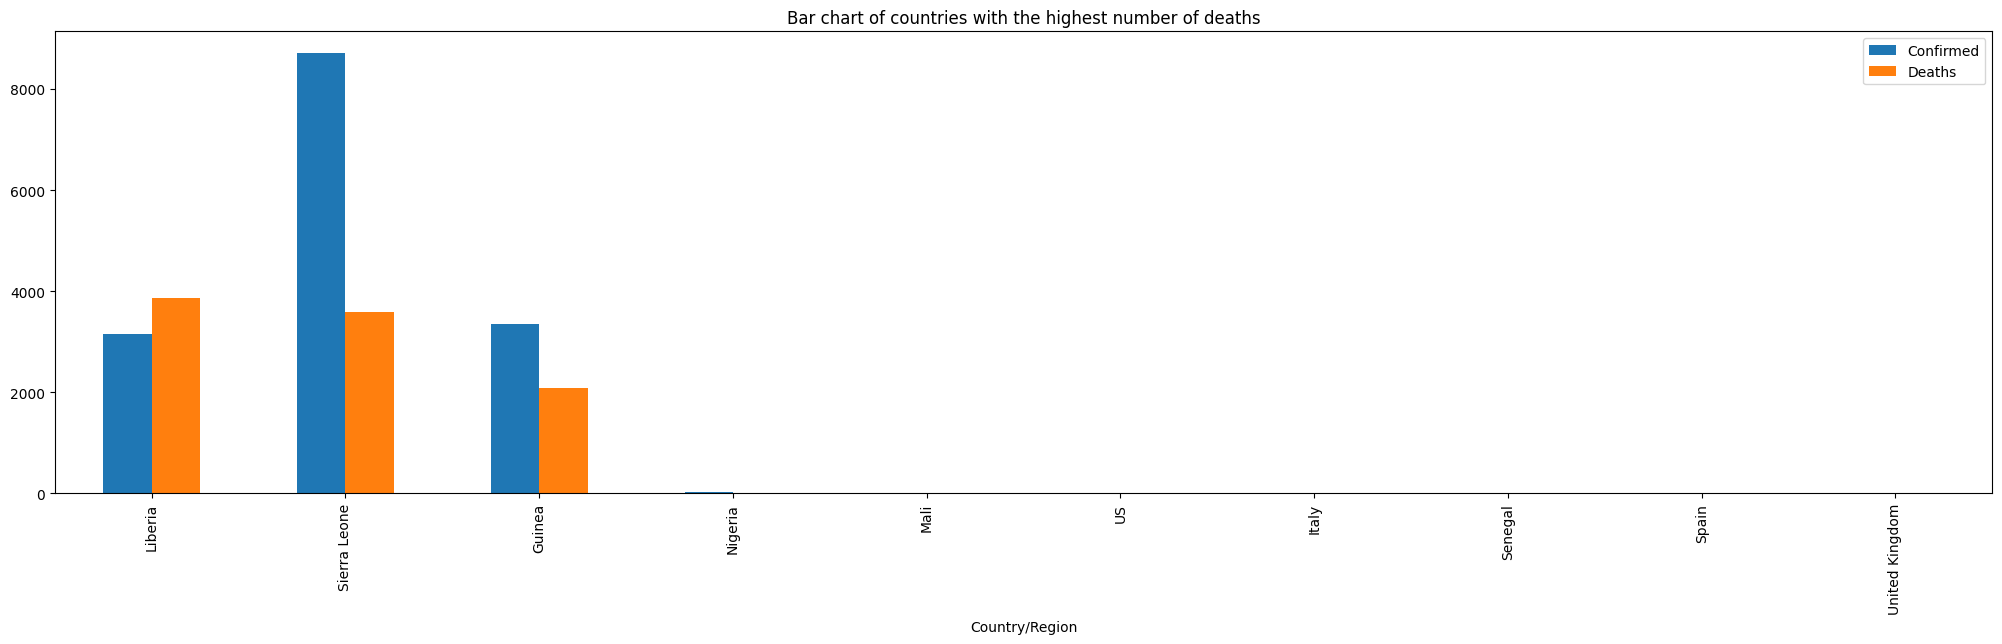

In [33]:
ebola_countries.nlargest(10, 'Confirmed').plot(kind='bar', figsize = (25, 6), title = 'Bar chart of countries with the highest number of confirmed cases')
ebola_countries.nlargest(10, 'Deaths').plot(kind='bar', figsize = (25, 6), title = 'Bar chart of countries with the highest number of deaths')

<Axes: ylabel='count'>

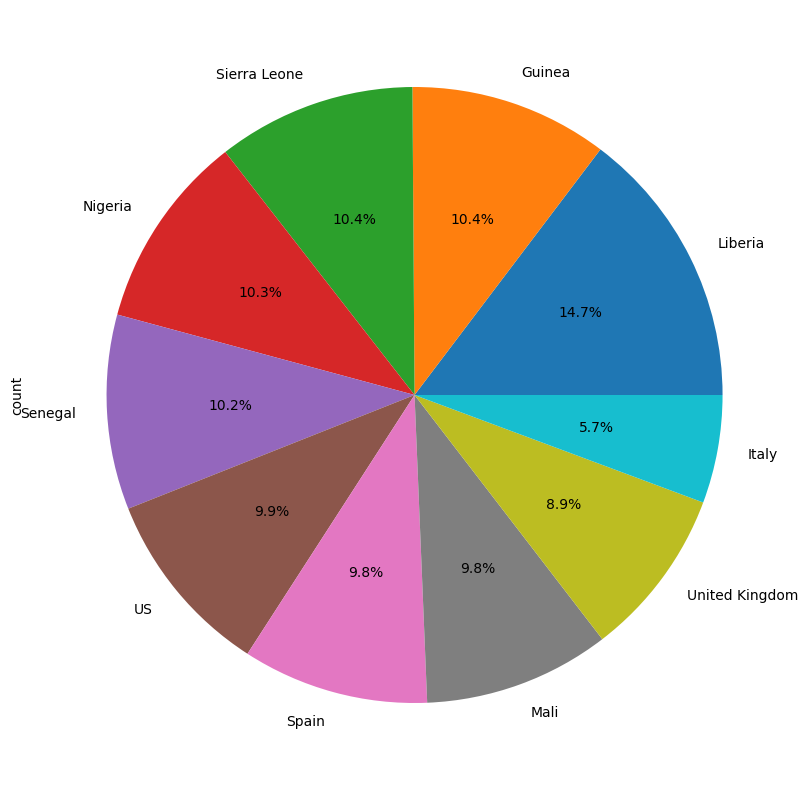

In [34]:
# pie chart visual of countries with ebola cases
ebola['Country/Region'].value_counts().plot.pie(autopct='%1.1f%%', figsize = (15, 10)) 